## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print("The no of observations in dataset are",df.shape[0]) 

The no of observations in dataset are 294478


c. The number of unique users in the dataset.

In [4]:
print("The total no of unique users are",df['user_id'].nunique())  #Many Users have same user id

The total no of unique users are 290584


d. The proportion of users converted.

In [5]:
print("The propotion of users converted are",sum(df['converted'])/df.shape[0])

The propotion of users converted are 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [11]:
Line_Treatement=df.loc[(df['landing_page']=='new_page') & (df['group']=="treatment"),].shape[0] #Find no of entries where they do line up
Line_Control=df.loc[(df['landing_page']=='old_page') & (df['group']=="control"),].shape[0] 
#Total_entried=df.shape[0]
print("The total no of times new page and treatment dont line up are",Total_entried-Line_Upentries-Line_Control)

The total no of times new page and treatment dont line up are 3893



f. Do any of the rows have missing values?

In [13]:
if(any(df.isnull())):        #any computes True if any value in the return structure is True
    print("Rows does have null value")
else:
    print("Rows does not contain any null value")

Rows does have null value


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
#Only Relevant  user Id
dfnew1=df.loc[(df['landing_page']=='new_page') & (df['group']=="treatment"),] 
dfnew2=df.loc[(df['landing_page']=='old_page') & (df['group']=="control"),]
df2=pd.concat([dfnew1,dfnew2],axis=0)   #Concanating the Rows

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [17]:
df2.head(3)


,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


a. How many unique **user_id**s are in **df2**?

In [18]:
print("The no of Unique user_id in dataframe are",df2['user_id'].nunique())

The no of Unique user_id in dataframe are 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [19]:
print("The user id repeated was",df2['user_id'].value_counts().head(1))

The user id repeated was 773192    2
Name: user_id, dtype: int64


c. What is the row information for the repeat **user_id**? 

In [20]:
df2.query("user_id==773192")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [21]:
df2=df2.drop(1899)
df2.query("user_id==773192") #Checkinng if it ha been succesfully removed

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [22]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [23]:
Convert_Prob=df2.query("converted==1").shape[0]/df2.shape[0]
print("The probability of any individual converting is ", Convert_Prob)

The probability of any individual converting is  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

**Answer** To compute the Conditional probability that the person converted given that he was in control group  is - 
P(B/A)=P(Person was in Control group and converted)/P(Person was in control grp) 

In [65]:
Numerator=df2.loc[(df2['group']=='control') & (df2['converted']==1),].shape[0]
Denominator=df2.loc[df2['group']=='control',].shape[0]
ControlConverted= Numerator/Denominator
print("The probability is", Numerator/Denominator)

The probability is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

**Answer** To compute the Conditional probability that the person converted given that he was in treatment group  is - 
P(B/A)=P(Person was in treatement group and converted)/P(Person was in treatement grp)

In [66]:
Numerator=df2.loc[(df2['group']=='treatment') & (df2['converted']==1),].shape[0]
Denominator=df2.loc[df2['group']=='treatment',].shape[0]
TreatmentConverted=Numerator/Denominator
print("The probability is", Numerator/Denominator)

The probability is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [26]:
Numerator=df2.query("landing_page=='new_page'").shape[0]
print("The probality that he recieves new page equals",Numerator/df2.shape[0])

The probality that he recieves new page equals 0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Answer** Considering the probability calculated we conclude that the person converting from one page to other is almost equal in propotion to the person who have converted and was in the control group and also was equal in propotion to the person who have converted and was in treatement group. There does not seems to be any evidence in favour of one page over another

---------------------------------------------------------------

---------------------------------------------------------------

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**

   * Null Hypothesis(H0) = The conversion rate from old page to new page is similar or worse than the conversion rate from new page to old page 
   * Alternative Hypothesis(H1)= The conversion rate from old page to new page is greater than the conversion rate from new page to old page 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [27]:
Conversion_Rate=df2.loc[df['converted']==1,].shape[0]/df2.shape[0]
print("The convert Rate for p(new) under the null is ",Conversion_Rate)

The convert Rate for p(new) under the null is  0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [28]:
print("Since the conversion rate is assumed to be equal under the null, the convert rate for p(old) equals",Conversion_Rate)

Since the conversion rate is assumed to be equal under the null, the convert rate for p(old) equals 0.11959708724499628


c. What is $n_{new}$?

In [29]:
Conversion_No=df2.loc[df2['landing_page']=="new_page",].shape[0]
print("The no of observations regarding the new page equals",Conversion_No)

The no of observations regarding the new page equals 145310


d. What is $n_{old}$?

In [32]:
Conversion_No1=df2.loc[df2['landing_page']=="old_page",].shape[0]
print("The no of observations regarding the old page equals",Conversion_No)

The no of observations regarding the old page equals 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [42]:
new_page_converted=np.random.binomial(1,Conversion_Rate,Conversion_No)
#Binomial Dstribution

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [43]:
old_page_converted=np.random.binomial(1,Conversion_Rate,Conversion_No1)

   * In the Above Case since the Conversion rates are equal both for the old page and new page as according to null hypothesis we simulated binomially the sample for each group and the ability to convert itself to other page **

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [47]:
old_Page_converted=sum(old_page_converted)/old_page_converted.shape[0]
new_Page_converted=sum(new_page_converted)/new_page_converted.shape[0]
print("Conversion of  new to old",new_Page_converted-old_Page_converted)

Conversion of  new to old -0.0002065063259771155


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [51]:
p_diffs=[]
for i in range(1,10001):
    new_page_converted=np.random.binomial(1,Conversion_Rate,Conversion_No)
    old_page_converted=np.random.binomial(1,Conversion_Rate,Conversion_No1)
    old_Page_converted=sum(old_page_converted)/old_page_converted.shape[0]
    new_Page_converted=sum(new_page_converted)/new_page_converted.shape[0]
    p_diffs.append(new_Page_converted-old_Page_converted)
    if(i%1000==0):
        print("Portion",i,"completed") #To keeep track of the Progress
    
    

Portion 1000 completed
Portion 2000 completed
Portion 3000 completed
Portion 4000 completed
Portion 5000 completed
Portion 6000 completed
Portion 7000 completed
Portion 8000 completed
Portion 9000 completed
Portion 10000 completed


 * In the above cases we calculated the distribution of  conversion ratio for the new page and old page by bootstrapping . By law of large no it should  be representative of the population

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  17.,  146.,  597., 1455., 2534., 2665., 1729.,  658.,  167.,
          32.]),
 array([-4.24026323e-03, -3.40528932e-03, -2.57031540e-03, -1.73534149e-03,
        -9.00367581e-04, -6.53936699e-05,  7.69580241e-04,  1.60455415e-03,
         2.43952806e-03,  3.27450198e-03,  4.10947589e-03]),
 <a list of 10 Patch objects>)

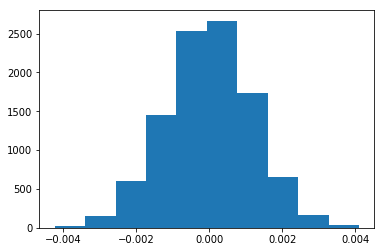

In [53]:
plt.hist(p_diffs)

**Answer** The histogram certainly looks like the normal distriution. Since we bootstrapped our sample a large no of times the difference of mean distribution should follow normal distribution by law of large large and thats what we found here. We therefore would now do the normal sample distribution centered at 0 with the same spread and size as found

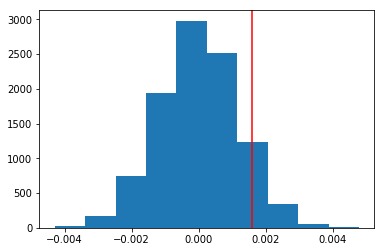

In [68]:
diffs=np.array(p_diffs)
null_values=np.random.normal(0,diffs.std(),diffs.size)
plt.hist(null_values) #Simulation from the null
plt.axvline(ControlConverted-TreatmentConverted,color="red")
#Here Control Converted refers to the people who migrated to new page 


#### The hypotheis are as follows
    * Null Hypothesis -> p(old)-p(new) <= 0
    * Alternative Hypthosis -> p(old) - p(new) > 0

* In other words our null hypothesis is that the conversion from new page to old is similar or infact worse than the conversion from the old page to new page

* Since we have to compute wether the new page is better than the old page , the area shaded will be only to the right of stastic to compute the p-value 



j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [70]:
Difference=ControlConverted-TreatmentConverted
print("The propotion of p_diffs greater than actual differnce observed equals",(null_values > Difference).mean())

The propotion of p_diffs greater than actual differnce observed equals 0.0885


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

   * The Value computed in part j is p-value 
   * The p value corresponds to the probablity that our stastic value belongs under the distribution of our assumed null hypothesis. Smaller p value indicate that value could not have come from null hypothesis distribution and null Hypothesis could therefore be rejected
   * A p value less than 0.05 is seems as the optimal value to reject the null hypothesis
   * Since our p value is about 0.0885, we still can't reject null hypothesis and conclude that stastically our new page design is not perfoming better than our old page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [77]:
import statsmodels.api as sm
convert_old =  df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new =  df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.loc[df2["landing_page"]=="old_page",].shape[0]
n_new = df2.loc[df2["landing_page"]=="new_page",].shape[0]

C:\Users\Yash\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [80]:
zstats,pvalue=sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative="larger")

print("Zstats",zstats)
print("pvalue",pvalue)
# Here Alternative is taken as the larger as we are intersted in null_propotions > Value

Zstats -1.3109241984234394
pvalue 0.9050583127590245


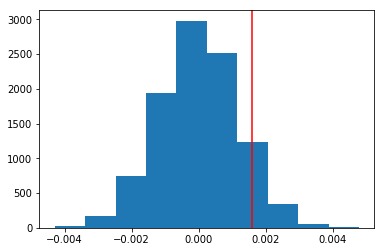

In [81]:
plt.hist(null_values) #Simulation from the null
plt.axvline(ControlConverted-TreatmentConverted,color="red")

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

   * P value is consistent with our findings from the part i and j and reinforces the fact that our null hypothesis can not be rejected in the favour of alternative hypothesis as p value dentotes the probability the stastic value falls under the null hypothesis distribution .
   * The z value indicates  how much standard deviation far our stastic value is from the mean. The z value obtained is consistent with the plot drawn above where red line shows where our stastic lie. Higher the z value, higher is the chance the value does not belong to the underlying distribution. A z value of 2 or more is generally considered to be the value not part of underlying distribution

-------------------------------------------------------------------

--------------------------------------------------------------------

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

 **Answer ** The Regression that we might be perfoming should be the Logistic Regression. the response variable is here bounded to two choices and is not unbounded, hence the choice of logistic regression versus linear regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [82]:
Group=pd.get_dummies(df2['group'],drop_first=True)  #Forming dummy Variables and dropping the first Cloumn
Group=Group.rename(columns={'treatment':'ab_page'})   
df2['Intercept']=1
df2=pd.concat([df2,Group],axis=1)       #Joining by column
df2.head(3)

,user_id,timestamp,group,landing_page,converted,Intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [83]:
lm=sm.Logit(df2['converted'],df2[['Intercept','ab_page']])
results=lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [84]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-29 13:06 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br> 

   * The p value has a score here of about 0.1899. while its low its, not low enough to reject the null hypothesis that there is no relationship between X and Y value. Hence according to results of the above model there seems to be no interdepedence between the X and Y variable. It seems to be different from the value predicted in Hypothesis Testing. 
   * The difference in prediction could be due to how we approach the problem. In Logistic Regression here the whole dataset is a representive and it seeks to find  is there any relationship between dependent variable and independent variable or not . The logistic regression also does not here do any preprocessing to  ensure that sample is representative of the whole population, while in hypothesis testing bootstrapping was done from the same dataset in large no to ensure that it becomes representative of the whole population
   * Hypothesis tested by the both Techniques is whollly different. Logistic regression seeks to find interdependence(Null Hypothesis) between the dependent and independent variable , while in our  Hypothesis testing we assumed that new change does is not significantly better from the old  
    

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

   * It is a good idea to consider other factor into the regression model . The response variable generally isn't depended upon the single variable and could it be depended on several other factor. Infact it could be the case that  two or more feature is interacting in some way and adding an interaction term  could lead to significant perfomance improvement. Few independent feature could lead to  High Bias model where it isn't able to generalize well to unseen output
    
   * However it should be ensured that features should be as independent as possible as sometimes when two or features is dependant on some way , it could lead to potential problems. More the no of feature , more the chance of relationship and poorer the perfomance. Also adding More feature than necessary could lead to overfitting where our model is essentially rote learning and is not able to generalize well

In [85]:
df3=pd.read_csv('countries.csv')
df3.head(3)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


In [86]:
df3=df3.merge(df2,how="inner") #Merging by Common User Id
df3.head(3)
df3[["UK","US"]]=pd.get_dummies(df3['country'],drop_first=True)

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 



In [88]:
lm=sm.Logit(df3['converted'],df3[['Intercept','ab_page','UK','US']])
results=lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-29 13:07 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

**Answer** It seems adding the country column seems to more explain whether the customer will convert or not. The p value corresponding to countries is smaller than the abpage , Infact the the column corresponding to countries have a p value only marginally larger than the threshold  to reject the null hypothesis(ie assumes the dependedent variable is independant of features)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

> To model the Interaction between the Categorical Columns we would need (2-1)* (3-1) more dummy variable in top of existing variable . The New entries would be ab_page with Uk and ab_page with Us for total of now 6 independedant variable  

In [89]:

df3['ab_pageUs']=df3['ab_page']*df3['US'] #DFirst Interaction Term
df3['ab_pageUK']=df3['ab_page']*df3['UK'] #Second Interaction Term
lm=sm.Logit(df3['converted'],df3[['Intercept','ab_page','UK','US','ab_pageUs','ab_pageUK']])
results=lm.fit()
results.summary2()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-29 13:07 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_pageUs      0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_pageUK      0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

 **Answer** Since Interacted Terms have a least P value among all , it shows the interacted term was most succesfully in predicting out the  response Variable ,  however it is a significant decrease from the perfomance when we didn't take the interacted term particularly in the relaltionship between the country and response variable. This showed that the country and group shouldn't have interacted in the first place

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])